In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.datasets import fetch_california_housing
california_data = fetch_california_housing()

In [20]:
california_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [21]:
california_data.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [22]:
california = pd.DataFrame(california_data.data, columns = data.feature_names)
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [24]:
california['MEDV'] = california_data.target

In [25]:
california.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

Exploratory Data Analysis

I will use some visualizations to understand the relationship of the target variable with other features.

Firstly, plot the distribution of the target variable MEDV.

/var/folders/qy/2nnpjb7s6t7cyk27328x2yrh0000gn/T/ipykernel_74655/2334069368.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(california['MEDV'],bins=30)


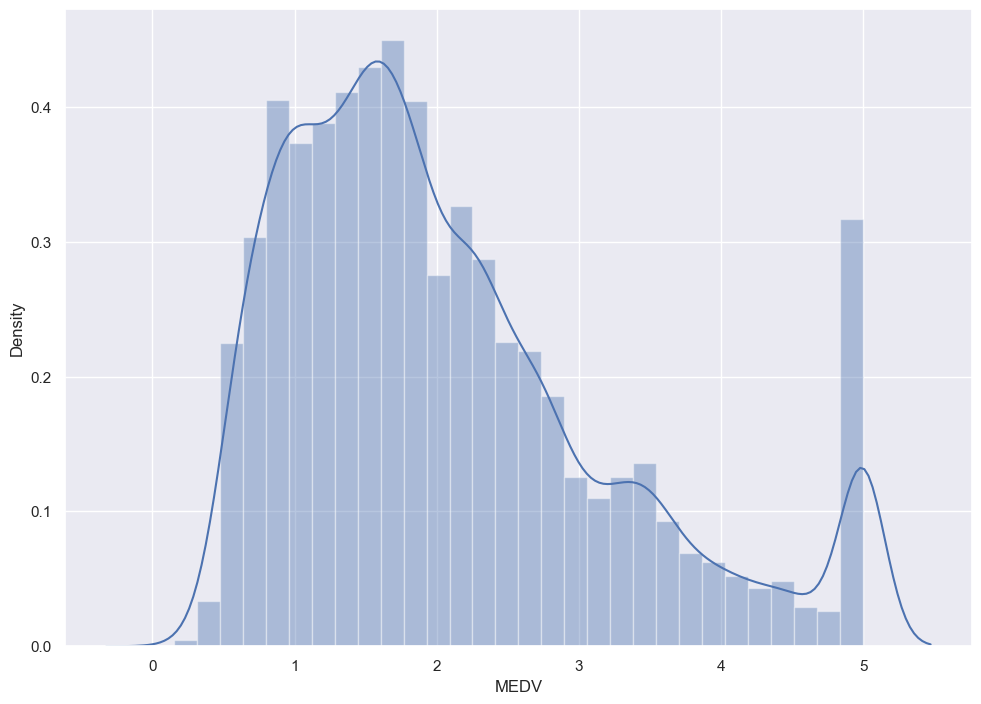

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(california['MEDV'],bins=30)
plt.show()

We see that the values of MEDV are distributed right-skewed normally distribution with few outliers, which means the statistical value mode<median<mean

Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will still use the heatmap function from the seabron library to plot the correlation matrix.

<Axes: >

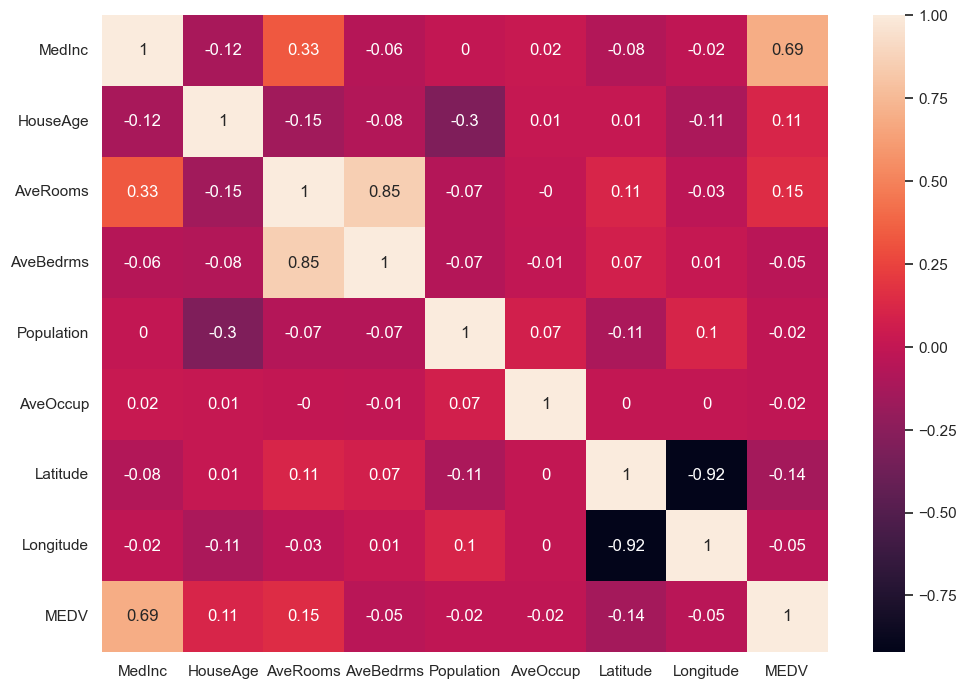

In [35]:
correlation_matrix = california.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

The correlation coefficient ranges from -1 to 1.

If the value is close to 1, it means that there is a strong positive correlation between two variables.

When it is close to -1, the variables have a strong negative correlation.

# Observstions:

(1) To fit a linear regression model,

we select those features which have a high correlation with our target variable MEDV.

By looking at the correlation matrix we can see that MedInc has a strong positive correlation with MEDV(0.69)

(2) An important point in selectiong features for a linear regression model is to check for multi-colinearity

The features AveBedrms, AveRooms have a correlation of 0.85.

These feature pairs are strongly correlated to each other.

We should not select both these features together for training the model.

Check this for an explanation. Some goes for the features Latitude and Longitude which have a correlation of -0.92.

### Based on the above observations we will use MedInc as our feature. Using scatterplot to see how the feather vary with MEDV.

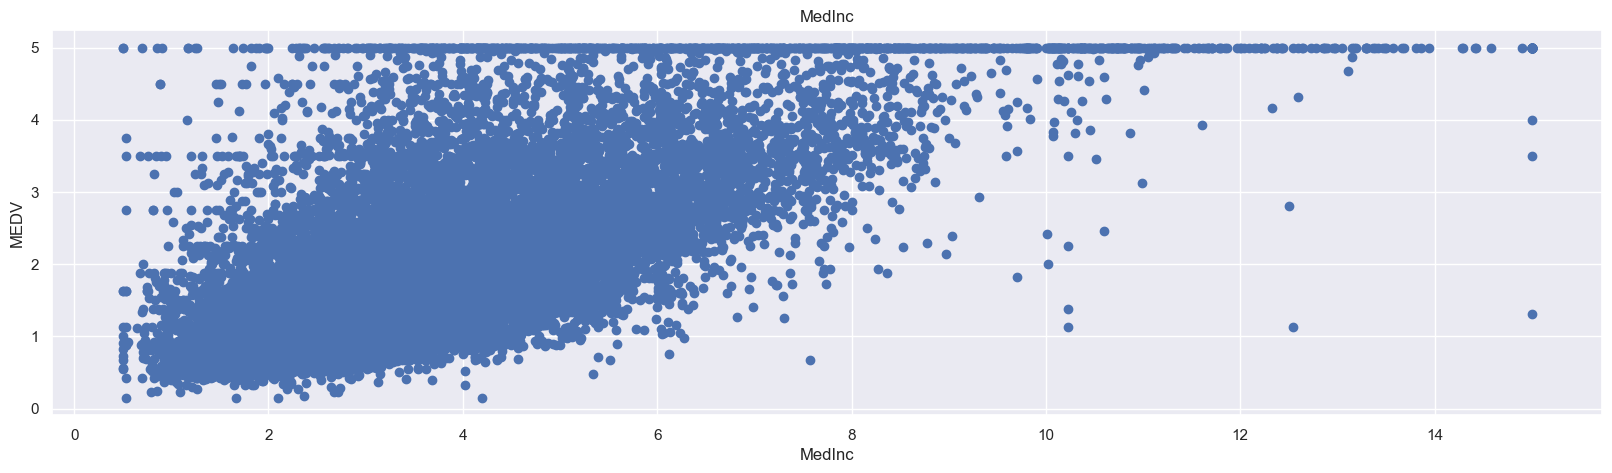

In [38]:
plt.figure(figsize=(20,5))

feature = ['MedInc']
target = california['MEDV']

for i, col in enumerate(feature):
    plt.subplot(1, len(feature), i+1)
    x = california[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# Preparing the data for training the model

We concatenate the MedInc columns using np.c_ provided by numpy library.

In [40]:
X = pd.DataFrame(np.c_[california['MedInc']], columns = ['MedInc'])
Y = california['MEDV']

# Splitting the data into training and testing sets

Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model's performance on unseen data. To split thhe data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and testing set to verify if the splitting has occurred properly.

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 1)
(4128, 1)
(16512,)
(4128,)


In [45]:
X_train.head()

,MedInc
5500,3.7250
15860,4.5057
7232,2.1250
6115,2.6629
8828,2.5812


# Training and testing the model

We use scikit-learn's LinearRegression to train our model on both the training and test sets.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [47]:
coeff = pd.DataFrame(lin_model.coef_, X.columns)
coeff.columns={'coeff'}
coeff

,coeff
MedInc,0.417159


In [48]:
lin_model.intercept_

0.4503668065820674

# How to interprete the coeff?

# Model Evalution

We will evaluate our model using RMSE and R2-score.

In [51]:
from sklearn.metrics import r2_score

# Model evalution for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Model evalution for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n") 

The model performance for training set
--------------------------------------
RMSE is 0.8359223196455023
R2 score is 0.4703942846392545


The model performance for testing set
--------------------------------------
RMSE is 0.8430087153316839
R2 score is 0.48490837623606453


